In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

##### Copyright 2018 The TensorFlow Authors.

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Running TFLite Models

## Setup

In [3]:
try:
    %tensorflow_version 2.x
except:
    pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.15.0


## Create a Basic Model of the Form y = mx + c

In [5]:
# Create a simple Keras model.
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd',
              loss='mean_squared_error')

model.fit(x, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 827ms/step - loss: 0.5835
Epoch 2/200
1/1 [==============================] - 0s 23ms/step - loss: 0.5707
Epoch 3/200
1/1 [==============================] - 0s 41ms/step - loss: 0.5584
Epoch 4/200
1/1 [==============================] - 0s 28ms/step - loss: 0.5464
Epoch 5/200
1/1 [==============================] - 0s 20ms/step - loss: 0.5348
Epoch 6/200
1/1 [==============================] - 0s 22ms/step - loss: 0.5235
Epoch 7/200
1/1 [==============================] - 0s 30ms/step - loss: 0.5125
Epoch 8/200
1/1 [==============================] - 0s 18ms/step - loss: 0.5018
Epoch 9/200
1/1 [==============================] - 0s 30ms/step - loss: 0.4914
Epoch 10/200
1/1 [==============================] - 0s 21ms/step - loss: 0.4811
Epoch 11/200
1/1 [==============================] - 0s 32ms/step - loss: 0.4712
Epoch 12/200
1/1 [==============================] - 0s 84ms/step - loss: 0.4614
Epoch 13/200
1/1 [==============================

## Generate a SavedModel

In [6]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

## Convert the SavedModel to TFLite

In [7]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [8]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

1080

## Initialize the TFLite Interpreter To Try It Out

In [9]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [10]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])

    # Test the TensorFlow model on random input data.
    tf_results = model(tf.constant(input_data))
    output_data = np.array(tf_results)

    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])

## Visualize the Model

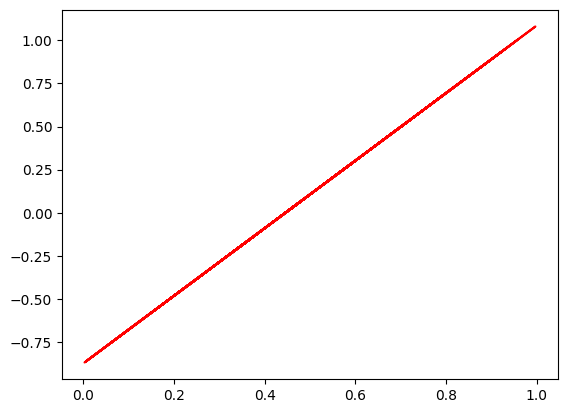

In [11]:
%matplotlib inline

plt.plot(inputs, outputs, 'r')
plt.show()

## Download the TFLite Model File

If you are running this notebook in a Colab, you can run the cell below to download the tflite model to your local disk.

**Note**: If the file does not download when you run the cell, try running the cell a second time.

In [12]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>